In [110]:
#import libraries that will be used for EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
#Load insurance data set into insurance dataframe
insurance = pd.read_csv('C:/Users/FenilM/Documents/Python Scripts/Course 2 Applied Statistics - Week 4 - Insurance Project/insurance.csv')

In [112]:
#First glance of the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [113]:
# Shape of the data
insurance.shape

(1338, 7)

In [114]:
# Check Data type of each attiribute / column,  also since all the columns are non-null, -
# it simply means that there is no null vallues in the data set
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [115]:
#other way to check if data set has any null values 
insurance.isnull().any().any()

False

In [116]:
# If yes, then which column and how many null values
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [117]:
#5 point summary for numerical values of data set
insurance.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [118]:
#5 point summary for all data of data set - this includes categorical descriptions as well 
insurance.describe(include = "all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338,NaN,NaN,NaN,39.207,14.05,18,27,39,51,64
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338,NaN,NaN,NaN,30.6634,6.09819,15.96,26.2963,30.4,34.6938,53.13
children,1338,NaN,NaN,NaN,1.09492,1.20549,0,0,1,2,5
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1338,NaN,NaN,NaN,13270.4,12110,1121.87,4740.29,9382.03,16639.9,63770.4


In [119]:
# Creating required data set for Distribution of ‘bmi’, ‘age’ and ‘charges’ columns
ABC_data = insurance[['age','bmi','charges']]
ABC_data

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520
...,...,...,...
1333,50,30.970,10600.54830
1334,18,31.920,2205.98080
1335,18,36.850,1629.83350
1336,21,25.800,2007.94500


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FE915DE2E0>,
      dtype=object)

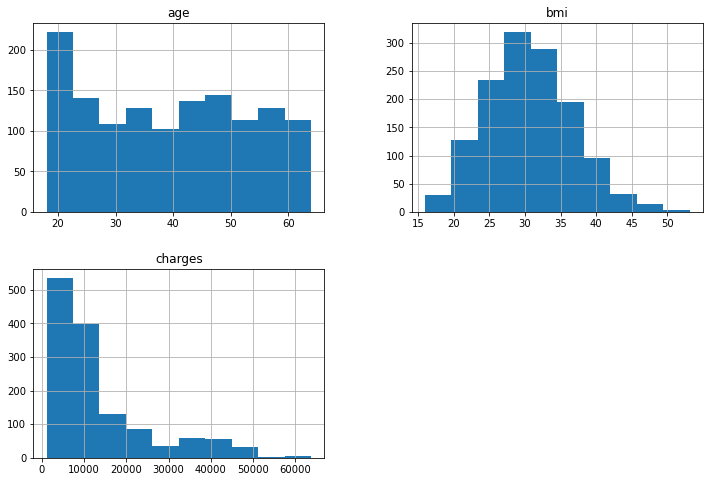

In [120]:
#Distribution of Age, BMI and Charges, we can see out of three BMI seems to follow proper normal distribution
ABC_data.hist(figsize = (12,8),grid=True)

age        0.055673
bmi        0.284047
charges    1.515880
dtype: float64


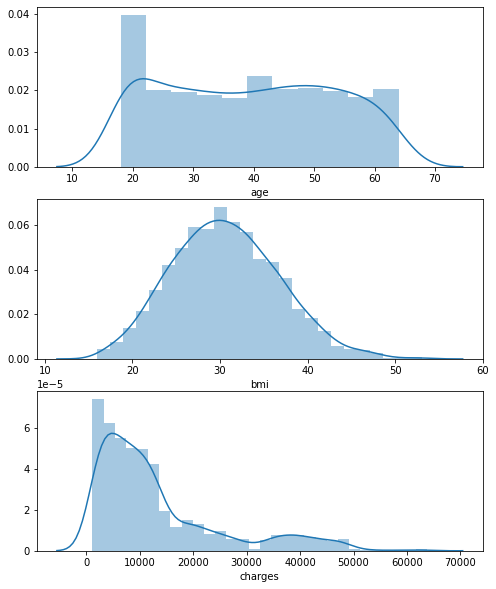

In [121]:
# Skewness of the Age, BMI and charges, closer the value to 0, perfectly the distribution follows normal distribution
Skewvalue = ABC_data.skew()
print(Skewvalue)
fig, ax = plt.subplots(3, figsize = (8,10))
sns.distplot(ABC_data.age, ax=ax[0])
sns.distplot(ABC_data.bmi, ax=ax[1])
sns.distplot(ABC_data.charges, ax=ax[2])

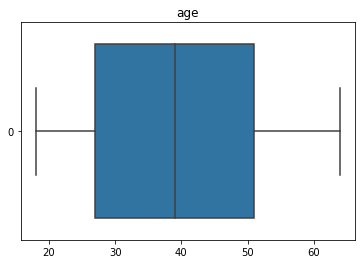

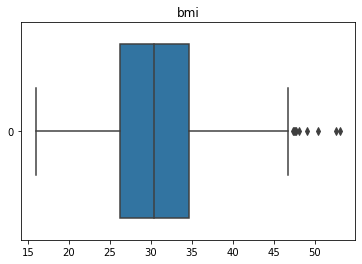

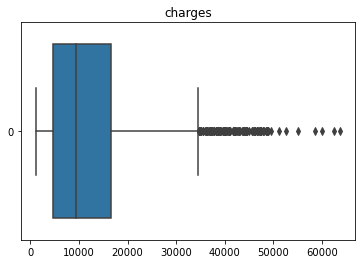

In [122]:
# Checking the presence in outliers for age ,bmi and charges, it is observed that charges have the most outliers 
for columns in ABC_data:
    plt.figure()
    plt.title(columns)
    sns.boxplot(data = ABC_data[columns], orient="h")

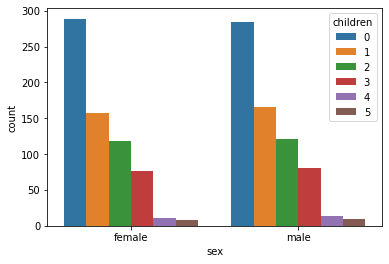

In [123]:
# Distribution of categorical columns (including children)
sns.countplot(insurance ['sex'], hue = insurance['children'])

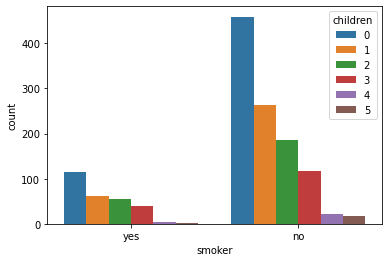

In [124]:
sns.countplot(insurance ['smoker'], hue = insurance['children'])

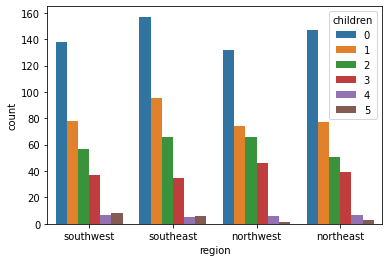

In [125]:
sns.countplot(insurance ['region'], hue = insurance['children'])

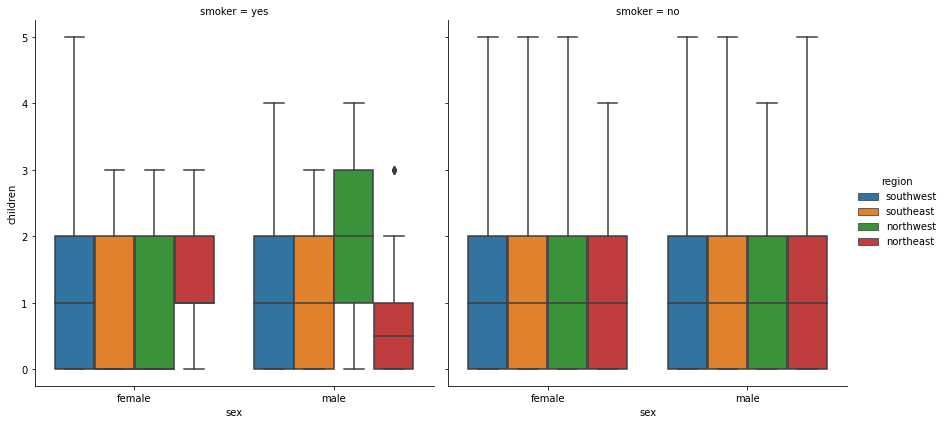

In [126]:
sns.catplot(x='sex',y='children', col='smoker',hue='region', data=insurance, kind="box" ,height = 6 )

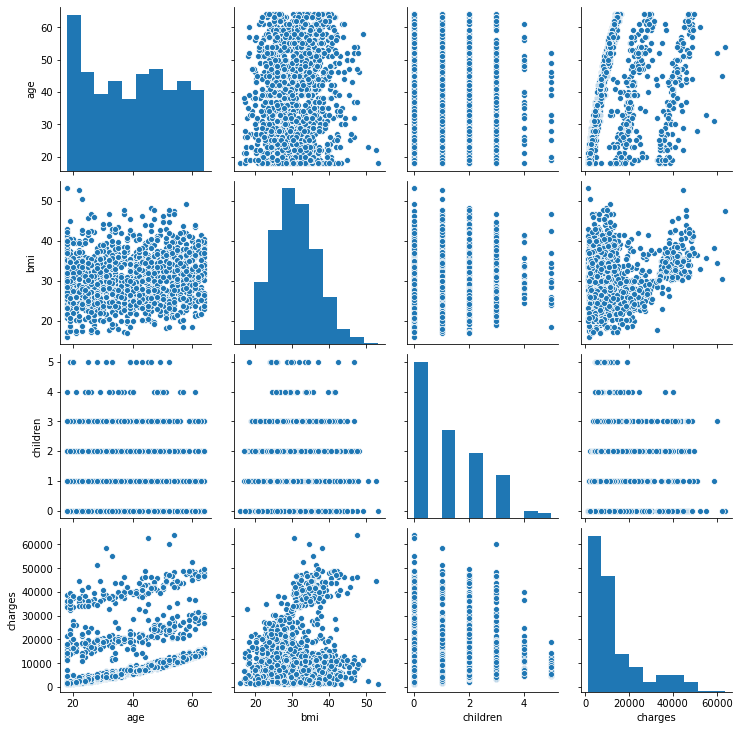

In [127]:
# pairplot for entire data frame
sns.pairplot(insurance) 


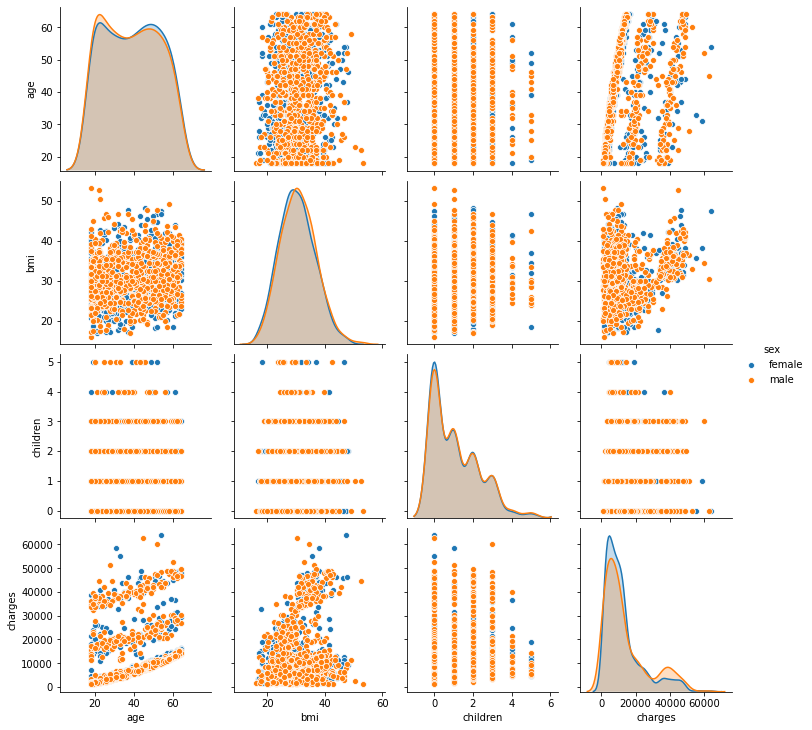

In [128]:
#pairplot for entire dataframe consedering number of males and females
sns.pairplot(insurance, hue = 'sex')

# 4. A. Do charges of people who smoke differ significantly from the people who don't?

Here, we want to prove that people who smoke are charged significantly different from people who dont.  
so,   
H1: People who smoke are charged different than people who dont smoke  
H0: People who smoke are NOT charged different than people who dont smoke, in simple terms people who smoke are charged same as people who dont smoke.
Considering significance level to be 5%

In [129]:
Q1 = insurance[['smoker', 'charges']]
Q1.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

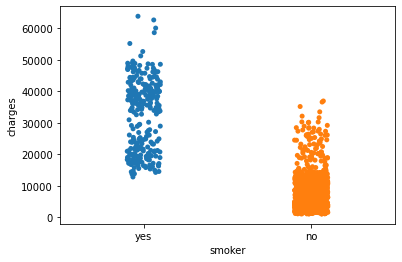

In [130]:
sns.stripplot(Q1['smoker'],Q1['charges'])
#looking at the the below distribution we can get an  idea that smokers are charged more as compared to nonsmokers

In [131]:
Q1.describe()

,charges
count,1338.000000
mean,13270.422265
std,12110.011237
min,1121.873900
25%,4740.287150
50%,9382.033000
75%,16639.912515
max,63770.428010


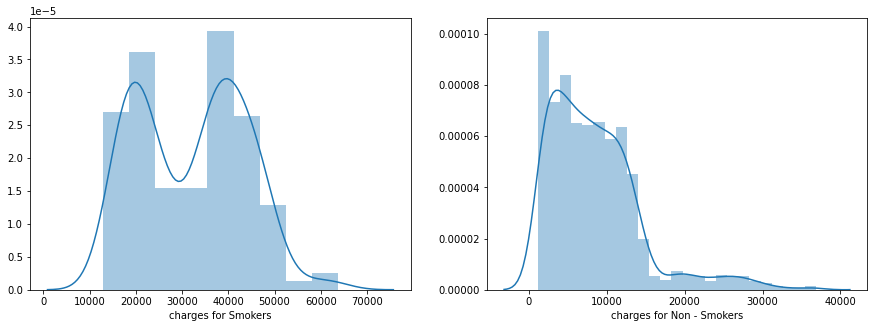

In [132]:
#checking the ditplots for smokers and non smokers
fig, ax = plt.subplots(1,2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.distplot(Q1.loc[Q1.smoker=='yes', 'charges'], ax=ax[0], axlabel = "charges for Smokers")
sns.distplot(Q1.loc[Q1.smoker=='no', 'charges'], ax=ax[1],  axlabel = "charges for Non - Smokers")


plt.show()

In [133]:
# Since we have sample size greater than 30 we can either use z-test or t-test.
# we can also check with Mann-Whitney U test (since the distribution for charges does not follow a normal distribution)
from statsmodels.stats.weightstats import ztest
from scipy.stats import mannwhitneyu

smokersf = Q1.loc[Q1.smoker=='yes','charges']
nonsmokersf = Q1.loc[Q1.smoker=='no','charges']

alpha = 0.05 #assuming significance level of 5%

test_statistic,p_value = ztest(smokersf , nonsmokersf)
print("Test statistic and p-value using ztest is" ,test_statistic,",", p_value ,  "respectively.")

if p_value<alpha:
    print('\nSince p value is smaller than alpha, We Reject the Null Hypothesis and \nit is proved that there is significant difference between the charges on smokers and non smokers ')
else:
    print('\nSince p value is geater than alpha, We fail to reject the null hupothesis and \nassume that charges for smokers and non smokers is not different' )

#test 2 with Mann - Whitney U test

m_stat,pval = mannwhitneyu(smokersf , nonsmokersf)
    
print("\n\nTest statistic and p-value using Mann-Whitney U test is" ,m_stat,",", pval ,  "respectively.")

if p_value<alpha:
    print('\nSince p value is smaller than alpha, We Reject the Null Hypothesis and \nit is proved that there is significant difference between the charges on smokers and non smokers ')
else:
    print('\nSince p value is geater than alpha, We fail to reject the null hupothesis and \nassume that charges for smokers and non smokers is not different' )
    
    

Test statistic and p-value using ztest is 46.664921172723716 , 0.0 respectively.

Since p value is smaller than alpha, We Reject the Null Hypothesis and 
it is proved that there is significant difference between the charges on smokers and non smokers 


Test statistic and p-value using Mann-Whitney U test is 7403.0 , 2.6351167222517853e-130 respectively.

Since p value is smaller than alpha, We Reject the Null Hypothesis and 
it is proved that there is significant difference between the charges on smokers and non smokers 


# 4.B. Does bmi of males differ significantly from that of females?

Here, we want to prove that bmi of males differs significantly from that of females.  
so,   
H1: bmi of males differs significantly from that of females    
H0: bmi of males does not differ significantly from that of females  
Considering significance level to be 5%  

In [134]:
#getting required data set
Q2 = insurance[['sex','bmi']]
Q2.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

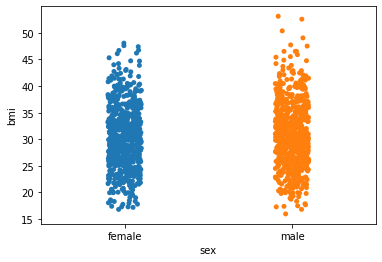

In [135]:
sns.stripplot(Q2['sex'],Q2['bmi'])
# we can observe that bmi distribution across male and female is nearly same as per below plot

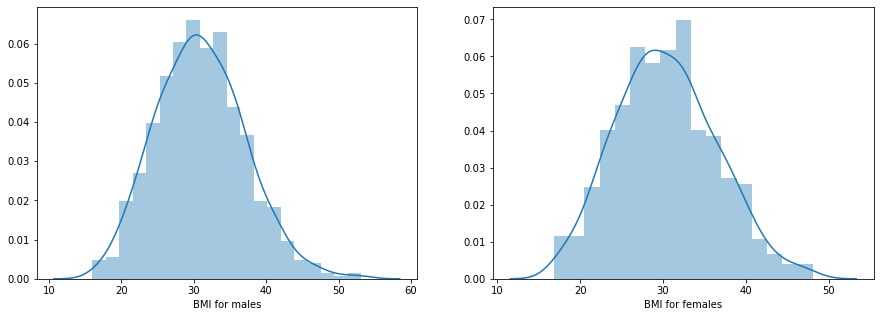

In [136]:
fig, ax = plt.subplots(1,2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.distplot(Q2.loc[Q2.sex=='male', 'bmi'],ax=ax[0] , axlabel="BMI for males")
sns.distplot(Q2.loc[Q2.sex=='female', 'bmi'],ax=ax[1], axlabel="BMI for females")

plt.show()

In [137]:
# Since we have sample size greater than 30 we can either use z-test or t-test here
#assuming significance level of 5% alpha declared above.
from scipy.stats import ttest_ind

malep = Q2.loc[Q2.sex=='male', 'bmi']
femalep = Q2.loc[Q2.sex=='female', 'bmi']

test_statistic , p_value = ttest_ind(malep,femalep)

print("Test statistic and p-value using ttest is" ,test_statistic,",", p_value ,  "respectively.")

if p_value<alpha:
    print('\nSince p value is smaller than alpha, We Reject the Null Hypothesis and \nit is proved that bmi of males differs significantly from that of females')
else:
    print('\nSince p value is greater than alpha, We fail to reject the null hupothesis and \nassume that bmi of males does not differ significantly from that of females' )


Test statistic and p-value using ttest is 1.696752635752224 , 0.08997637178984932 respectively.

Since p value is greater than alpha, We fail to reject the null hupothesis and 
assume that bmi of males does not differ significantly from that of females


# 4. C. Is the proportion of smokers significantly different in different genders

Here, we want to prove that proportion of smokers are different in different genders  
so,  
H1: proportion of smokers are significantly different in different genders  
H0: proportion of smokers are same in different genders  
Considering significance level to be 5%  

In [138]:
# Create the data set for smokers and genders
Q3 = insurance[['sex', 'smoker']]

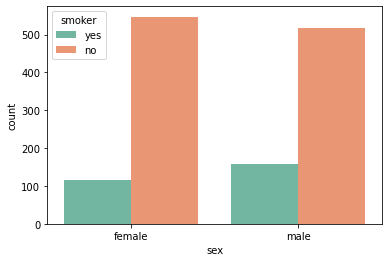

In [139]:
sns.countplot(x=insurance['sex'] , hue = insurance['smoker'] , palette='Set2')
#from the below plot we can get an rough idea that proportion of male smoker compared to female smoker is high

In [140]:
# identify the proportions of male smokers and female smokers with their respective total count 
male_smokers = Q3[Q3['sex'] =='male'].smoker.value_counts()[1]
print ('Number of male smokers:', male_smokers)
female_smokers = Q3[Q3['sex'] =='female'].smoker.value_counts()[1]
print ('Number of female smokers:', female_smokers)
total_male = Q3.sex.value_counts()[0]
print('Total number of males:', total_male)
total_female = Q3.sex.value_counts()[1]
print('Total number of females:', total_female)
print('\nMale proportion:', round(male_smokers/total_male*100,2), '% and Female poportion:', round(female_smokers/total_female*100,2),"%")


Number of male smokers: 159
Number of female smokers: 115
Total number of males: 676
Total number of females: 662

Male proportion: 23.52 % and Female poportion: 17.37 %


In [141]:
#to find if the proportion differ significantly we can use ztestfor proportions
from statsmodels.stats.proportion import proportions_ztest

test_statistics, p_value = proportions_ztest([male_smokers,female_smokers] , [total_male,total_female])

print("Test statistic and p-value using ztest for proportions is" ,test_statistic,",", p_value ,  "respectively.")

if p_value<alpha:
    print('\nSince p value is smaller than alpha, We Reject the Null Hypothesis and \nit is proved that proportion of smokers are significantly different in different genders')
else:
    print('\nSince p value is greater than alpha, We fail to reject the null hupothesis and \nassume that proportion of smokers are same in different genders' )


Test statistic and p-value using ztest for proportions is 1.696752635752224 , 0.005324114164320532 respectively.

Since p value is smaller than alpha, We Reject the Null Hypothesis and 
it is proved that proportion of smokers are significantly different in different genders


# 4 D. Is the distribution of bmi across women with no children, one child and two children, the same

here we want to prove that bmi distributions with no children, one child and two children is different    
so,  
H1: bmi distributions among women with no children, one child and two children is different  
H0: bmi distributions among women with no children, one child and two children is same  
Considering significance level to be 5%  

In [142]:
#Create the data set of children and bmi for each women in insurance data set
Q4 = insurance[insurance.sex == 'female']
Q4 = Q4[['children','bmi']]
Q4

,children,bmi
0,0,27.90
5,0,25.74
6,1,33.44
7,3,27.74
9,0,25.84
...,...,...
1332,3,44.70
1334,0,31.92
1335,0,36.85
1336,0,25.80


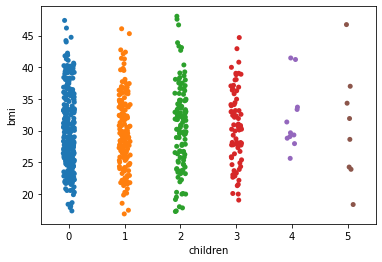

In [143]:
sns.stripplot(Q4['children'],Q4['bmi'])
#from the below plot we can get an rough idea that bmi across the women with different no. of children is distributed equally

In [144]:
#create the separate array of bmi based on the number of children
child0 = Q4.loc[Q4.children == 0,'bmi']
child1 = Q4.loc[Q4.children == 1,'bmi']
child2 = Q4.loc[Q4.children == 2,'bmi']

len(child0), len(child1),len(child2)

(289, 158, 119)

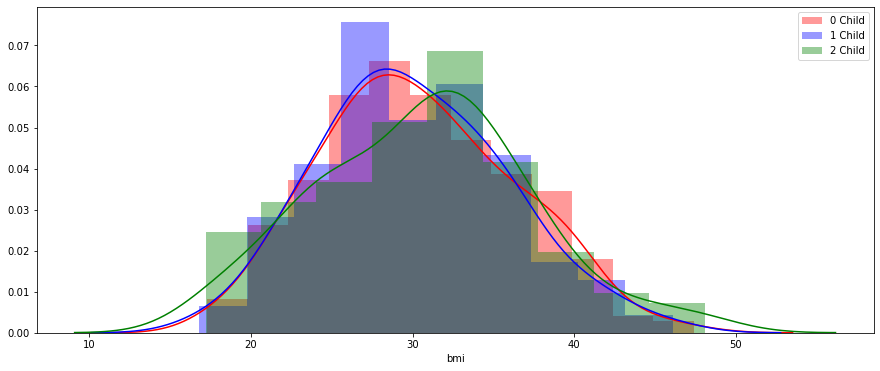

In [145]:
#Graphical representation for distribution of bmi for women with 0 children, 1 child and 2 children
plt.figure(figsize=(15,6))
sns.distplot(child0, color = 'red', label = '0 Child')
sns.distplot(child1, color = 'blue', label = '1 Child')
sns.distplot(child2, color = 'green', label = '2 Child')
plt.legend()
#it shows that bmi distribution is almost similar

In [146]:
#ANOVA test to check the distribution of more than two groups
from scipy.stats import f_oneway

test_statistic , p_value = f_oneway(child0,child1,child2)
print("Test statistic and p-value using oneway anova test is" ,test_statistic,",", p_value ,  "respectively.")

if p_value<alpha:
    print('\nSince p value is smaller than alpha, We Reject the Null Hypothesis and \nit is proved that bmi distributions among women with no children, one child and two children is different')
else:
    print('\nSince p value is greater than alpha, We fail to reject the null hupothesis and \nassume that bmi distributions among women with no children, one child and two children is same' )


Test statistic and p-value using oneway anova test is 0.3344720147757968 , 0.7158579926754841 respectively.

Since p value is greater than alpha, We fail to reject the null hupothesis and 
assume that bmi distributions among women with no children, one child and two children is same
